# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

Project Purpose and Planned Actions

Project Purpose:

The purpose of this project is to analyze the calling behavior of Megaline's customers subscribed to the Surf and Ultimate prepaid plans. By examining user data on calls, texts, and data usage, we aim to determine which plan generates more revenue for Megaline. This information will be valuable for the commercial department to adjust their advertising budget and potentially target specific user segments.

Planned Actions:

Data Acquisition and Preparation: We will download the provided datasets on users, calls, messages, internet usage, and plans. Once downloaded, I will help you organize the data into a structured format suitable for analysis.

Customer Segmentation: We will segment the data based on user subscriptions (Surf vs. Ultimate plan).

Usage Analysis: For each user segment, we will calculate:
Average monthly call minutes, text messages sent, and data usage.
Monthly revenue generated based on plan inclusions, per-minute/text/data charges, and the user's actual usage.

Distribution Analysis: We will visualize the distribution of call minutes, texts, and data usage for each plan using histograms. This will help us understand usage patterns and identify any outliers.

Hypothesis Testing: We will formulate and test hypotheses to determine if there is a statistically significant difference in average revenue between the Surf and Ultimate plans.

Conclusion: Based on the analysis, we will draw conclusions about which plan generates more revenue and recommend any insights for the commercial department regarding their advertising strategy.

Iterative Process:

As you mentioned, data analysis is often iterative. We may need to revisit previous steps as we gain insights from the data. For example, if we discover outliers significantly impacting the average revenue, we might need to investigate them further or exclude them from the analysis depending on their validity.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set seaborn style
sns.set(style="whitegrid")

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv("/datasets/megaline_calls.csv")
internet_df = pd.read_csv("/datasets/megaline_internet.csv")
messages_df = pd.read_csv("/datasets/megaline_messages.csv")
plans_df = pd.read_csv("/datasets/megaline_plans.csv")
users_df = pd.read_csv("/datasets/megaline_users.csv")

## Prepare the data

In [3]:
# Displaying general information about each dataset
print("Users dataset:")
print(users_df.info())
print("\nCalls dataset:")
print(calls_df.info())
print("\nMessages dataset:")
print(messages_df.info())
print("\nInternet dataset:")
print(internet_df.info())
print("\nPlans dataset:")
print(plans_df.info())

Users dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

Calls dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage:

Based on the initial exploration of the datasets, here are some observations and potential corrections needed:

Users Dataset:
        No apparent issues. Dtype for reg_date and churn_date should be converted to datetime.

Calls Dataset:
        Dtype for call_date should be converted to datetime.
        The duration column may need to be rounded up to the nearest minute as per Megaline's rounding policy.

Messages Dataset:
        Dtype for message_date should be converted to datetime.

Internet Dataset:
        Dtype for session_date should be converted to datetime.
        The mb_used column may need to be rounded up to the nearest gigabyte as per Megaline's rounding policy.

Plans Dataset:
        The column usd_monthly_pay should be renamed to usd_monthly_fee to match the provided description.
        No apparent issues with data types.

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame# Displaying general information about the plans dataset
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Print a sample of data for plans
display(plans_df.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Observations:

    The data sample provides information about two prepaid plans offered by the telecom operator Megaline: Surf and Ultimate.
    Each plan has different allowances and charges for included minutes, messages, and data usage, as well as a monthly fee.
    The 'surf' plan includes 50 messages, 15,360 MB (15 GB) of data, and 500 minutes of calls for a monthly fee of $20. Additional charges apply for exceeding the limits.
    The 'ultimate' plan offers a higher allowance with 1000 messages, 30,720 MB (30 GB) of data, and 3000 minutes of calls for a monthly fee of $70. Similarly, additional charges apply for exceeding the limits.
    The charges for additional usage (per minute, per message, and per gigabyte) are lower for the 'ultimate' plan compared to the 'surf' plan, indicating a higher level of service provided by the 'ultimate' plan.
    Overall, the 'ultimate' plan offers more generous allowances for a higher monthly fee, making it suitable for users with higher usage requirements, while the 'surf' plan is more budget-friendly with lower allowances and charges.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

Based on the initial observations, there don't seem to be any obvious issues with the data in the plans_df. The data appears to be consistent with the provided description of the plans. It seems that the data in plans_df is already correct.

## Enrich data

In [6]:
# Convert 'mb_per_month_included' to gigabytes
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Rename the column to 'gb_per_month_included'
plans_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

# Display the updated plans dataframe
display(plans_df)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


Since the plans_df contains all the necessary information about the prepaid plans offered by Megaline, there's no immediate need to add additional factors to this dataframe. It seems that the existing information in plans_df is comprehensive for the current analysis.


## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
display(users_df.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


OBSERVATIONS:
    
General Information:

    The Users DataFrame contains information about Megaline users, including user IDs, names, ages, cities, registration dates, subscription plans, and churn dates (if applicable).
    Data types seem appropriate for most columns.
    There might be missing values in the churn_date column for users who are still subscribed.
    We need to ensure that the reg_date and churn_date columns are of datetime data type for consistency and easier manipulation.

Printed Data Sample:

    Each row represents a user with details such as user ID, name, age, city, registration date, subscription plan, and churn date (if applicable).
    The sample includes users with different ages, cities, subscription plans, and registration dates.
    Churn date is missing for all users in the sample, indicating that they are still subscribed.

Potential Issues:

    Missing values in the churn_date column may need further investigation to determine if they are intentional (indicating active subscriptions) or if there are data entry errors.
    Data types for reg_date and churn_date columns should be converted to datetime for consistency and easier manipulation.

Proposed Fixes:

    Convert the reg_date and churn_date columns to datetime data type.
    Handle missing values in the churn_date column appropriately based on the context of the data.
    No other issues regarding inappropriate data types or missing data are apparent from the initial observations.

### Fix Data

In [9]:
# Convert date columns to datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

In [10]:
# Check for duplicate rows in the users DataFrame
duplicate_users = users_df[users_df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate rows in users DataFrame:")
print(duplicate_users)

Duplicate rows in users DataFrame:
Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [11]:
# Extracting state information from the 'city' column
users_df['state'] = users_df['city'].str.split(',').str[-1].str.split(' ').str[-2]

# Check for duplicate rows in the users DataFrame
duplicate_users = users_df[users_df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate rows in users DataFrame:\n", duplicate_users)

# Displaying the updated dataframe
display(users_df.head())

Duplicate rows in users DataFrame:
 Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date, state]
Index: []


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA


## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
display(calls_df.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


OBSERVATIONS:

    Each row represents a call made by a user, with details including call ID (id), user ID (user_id), call date (call_date), and call duration (duration).
    The call durations seem to be represented in minutes, with decimal values indicating fractions of a minute.
    The call_date column is in the correct date format (YYYY-MM-DD).

Potential Issues:

    No obvious issues such as missing values or inappropriate data types are apparent from the sample data or general information.

Recommendations:

    It would be beneficial to further analyze the distribution of call durations to identify any outliers or inconsistencies that may need to be addressed.
    Consider converting the call_date column to datetime data type for easier manipulation and analysis of date-related operations.
    Ensure consistency in representing call durations (e.g., all durations in minutes) for accurate analysis and calculations.

### Fix data

In [14]:
# Convert call_date to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Round up duration to the nearest minute
calls_df['duration'] = np.ceil(calls_df['duration'])

print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enrich data

In [15]:
# Extract day of the week from call_date (0=Monday, 6=Sunday)
calls_df['day_of_week'] = calls_df['call_date'].dt.dayofweek

# Extract month from call_date
calls_df['month'] = calls_df['call_date'].dt.month

# Check for duplicate rows in the calls DataFrame
duplicate_calls = calls_df[calls_df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate rows in users DataFrame:\n", duplicate_calls)

# Displaying the updated dataframe
display(calls_df.head())

Duplicate rows in users DataFrame:
 Empty DataFrame
Columns: [id, user_id, call_date, duration, day_of_week, month]
Index: []


,id,user_id,call_date,duration,day_of_week,month
0,1000_93,1000,2018-12-27,9.0,3,12
1,1000_145,1000,2018-12-27,14.0,3,12
2,1000_247,1000,2018-12-27,15.0,3,12
3,1000_309,1000,2018-12-28,6.0,4,12
4,1000_380,1000,2018-12-30,5.0,6,12


## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Print a sample of data for messages
display(messages_df.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Observations:
General Information:

    The Messages DataFrame contains 76,051 entries and 3 columns.
    There are no missing values in any of the columns.
    The data types are as follows:
        id: Object (likely a unique identifier for each message)
        user_id: Integer (identifier for the user who sent the message)
        message_date: Object (date of the message)
            
It would be beneficial to convert the message_date column to datetime data type for easier manipulation and analysis of date-related operations.

Ensure data consistency and accuracy by verifying that the message dates are represented consistently throughout the dataset.

### Fix data

In [18]:
# Convert message_date to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Displaying the first few rows of the updated dataframe
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enrich data

In [19]:
# Extract day of the week from message_date (0=Monday, 6=Sunday)
messages_df['day_of_week'] = messages_df['message_date'].dt.dayofweek

# Extract month from message_date
messages_df['month'] = messages_df['message_date'].dt.month

# Check for duplicate rows in the messages DataFrame
duplicate_messages = messages_df[messages_df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate rows in users DataFrame:\n", duplicate_messages)

# Displaying the updated dataframe
display(messages_df.head())

Duplicate rows in users DataFrame:
 Empty DataFrame
Columns: [id, user_id, message_date, day_of_week, month]
Index: []


,id,user_id,message_date,day_of_week,month
0,1000_125,1000,2018-12-27,3,12
1,1000_160,1000,2018-12-31,0,12
2,1000_223,1000,2018-12-31,0,12
3,1000_251,1000,2018-12-27,3,12
4,1000_255,1000,2018-12-26,2,12


## Internet

In [20]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Print a sample of data for the internet traffic
display(internet_df.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Observations:
General Information:

    The Internet DataFrame contains 104,825 entries and 4 columns.
    There are no missing values in any of the columns.
    The data types are as follows:
        id: Object (likely a unique identifier for each internet session)
        user_id: Integer (identifier for the user who used internet)
        session_date: Object (date of the internet session)
        mb_used: Float64 (volume of data used in megabytes)

It would be beneficial to convert the session_date column to datetime data type for easier manipulation and analysis of date-related operations.

Ensure data consistency and accuracy by verifying that the message dates are represented consistently throughout the dataset.

### Fix data

In [22]:
# Convert session_date to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Print the general information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
# Extract day of the week from session_date (0=Monday, 6=Sunday)
internet_df['day_of_week'] = internet_df['session_date'].dt.dayofweek

# Extract month from session_date
internet_df['month'] = internet_df['session_date'].dt.month

# Check for duplicate rows in the internet DataFrame
duplicate_internet = internet_df[internet_df.duplicated()]

# Display the duplicate rows, if any
print("Duplicate rows in users DataFrame:\n", duplicate_internet)

# Displaying the updated dataframe
display(internet_df.head(10))

Duplicate rows in users DataFrame:
 Empty DataFrame
Columns: [id, user_id, session_date, mb_used, day_of_week, month]
Index: []


,id,user_id,session_date,mb_used,day_of_week,month
0,1000_13,1000,2018-12-29,89.86,5,12
1,1000_204,1000,2018-12-31,0.00,0,12
2,1000_379,1000,2018-12-28,660.40,4,12
3,1000_413,1000,2018-12-26,270.99,2,12
4,1000_442,1000,2018-12-27,880.22,3,12
5,1001_0,1001,2018-08-24,284.68,4,8
6,1001_3,1001,2018-12-09,656.04,6,12
7,1001_4,1001,2018-11-04,16.97,6,11
8,1001_10,1001,2018-11-27,135.18,1,11
9,1001_15,1001,2018-12-13,761.92,3,12


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [24]:
# Print out the plan conditions and make sure they are clear for you
display(plans_df)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [25]:
# Aggregating calls data
calls_agg = calls_df.groupby(['user_id', calls_df['call_date'].dt.to_period('M')]).agg({'duration': 'sum'}).reset_index()
calls_agg.rename(columns={'call_date': 'period'}, inplace=True)

# Aggregating messages data
messages_agg = messages_df.groupby(['user_id', messages_df['message_date'].dt.to_period('M')]).size().reset_index(name='message_count')
messages_agg.rename(columns={'message_date': 'period'}, inplace=True)

# Aggregating internet data
internet_agg = internet_df.groupby(['user_id', internet_df['session_date'].dt.to_period('M')]).agg({'mb_used': 'sum'}).reset_index()
internet_agg.rename(columns={'session_date': 'period'}, inplace=True)

# Merging aggregated dataframes
merged_data = calls_agg.merge(messages_agg, on=['user_id', 'period'], how='outer').merge(internet_agg, on=['user_id', 'period'], how='outer')

# Filling missing values with 0
merged_data.fillna(0, inplace=True)

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Convert 'mb_used' to gigabytes in the merged_data dataframe
merged_data['gb_used'] = np.ceil(merged_data['mb_used'] / 1024)

# Drop the 'mb_used' column
merged_data.drop(columns=['mb_used'], inplace=True)

# Display the updated merged_data dataframe
display(merged_data.head())

,user_id,period,duration,message_count,gb_used
0,1000,2018-12,124.0,11.0,2.0
1,1001,2018-08,182.0,30.0,7.0
2,1001,2018-09,315.0,44.0,14.0
3,1001,2018-10,393.0,53.0,22.0
4,1001,2018-11,426.0,36.0,19.0


In [27]:
# Merge users and plans dataframes based on 'plan' and 'plan_name' columns
merged_df = users_df.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Drop the redundant 'plan_name' column
merged_df.drop(columns=['plan_name'], inplace=True)

# Display the merged dataframe
display(merged_df.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,1000,30.0,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,50,15.0,500,20,10,0.03,0.03
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK,50,15.0,500,20,10,0.03,0.03
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03


In [28]:
# Merge merged_data and merged_df based on 'user_id' column
final_df = merged_data.merge(merged_df, on='user_id', how='left')

# Display the new merged dataframe
display(final_df.head())

,user_id,period,duration,message_count,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,state,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,1000,30.0,3000,70,7,0.01,0.01
1,1001,2018-08,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03
2,1001,2018-09,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03
3,1001,2018-10,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03
4,1001,2018-11,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,50,15.0,500,20,10,0.03,0.03


In [29]:
# Calculate excess usage for each user during each period
final_df['excess_minutes'] = final_df['duration'] - final_df['minutes_included']
final_df['excess_messages'] = final_df['message_count'] - final_df['messages_included']
final_df['excess_gb_used'] = final_df['gb_used'] - final_df['gb_per_month_included']

# Replace negative excess values with 0
final_df['excess_minutes'] = final_df['excess_minutes'].clip(lower=0)
final_df['excess_messages'] = final_df['excess_messages'].clip(lower=0)
final_df['excess_gb_used'] = final_df['excess_gb_used'].clip(lower=0)

# Display the first few rows of the dataframe to verify
display(final_df.head())

,user_id,period,duration,message_count,gb_used,first_name,last_name,age,city,reg_date,...,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,excess_minutes,excess_messages,excess_gb_used
0,1000,2018-12,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1001,2018-08,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2,1001,2018-09,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
3,1001,2018-10,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15.0,500,20,10,0.03,0.03,0.0,3.0,7.0
4,1001,2018-11,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,50,15.0,500,20,10,0.03,0.03,0.0,0.0,4.0


## Study user behaviour

### Calls

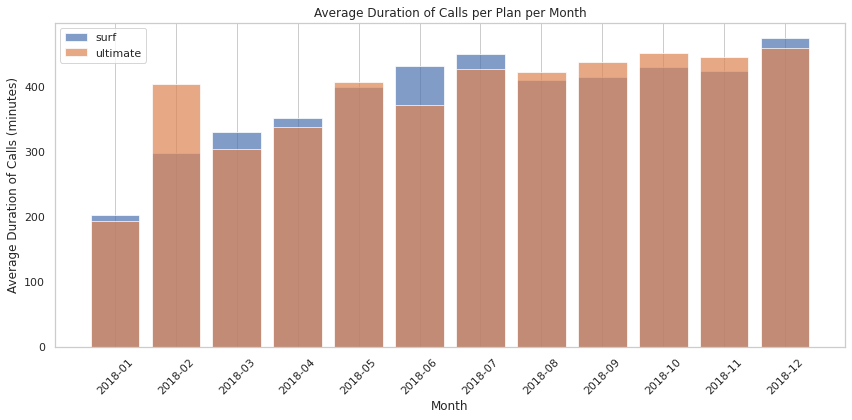

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

# Calculate average duration of calls per plan per month
avg_duration_calls = final_df.groupby(['plan', 'period'])['duration'].mean().reset_index()

# Convert period to string representation
avg_duration_calls['period'] = avg_duration_calls['period'].astype(str)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
for plan in avg_duration_calls['plan'].unique():
    data = avg_duration_calls[avg_duration_calls['plan'] == plan]
    plt.bar(data['period'], data['duration'], label=plan, alpha=0.7)

plt.title('Average Duration of Calls per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration of Calls (minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

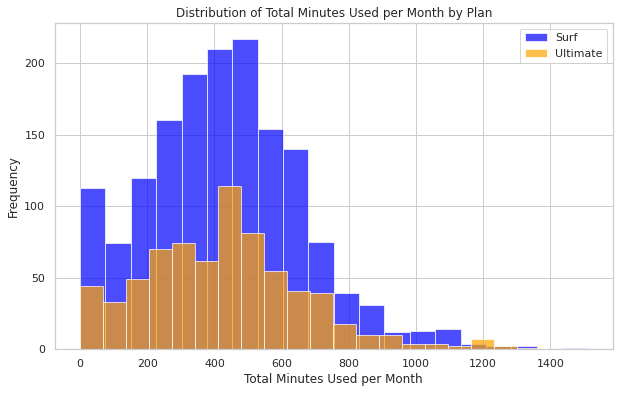

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

import matplotlib.pyplot as plt

# Filter data for each plan
surf_data = final_df[final_df['plan'] == 'surf']
ultimate_data = final_df[final_df['plan'] == 'ultimate']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(surf_data['duration'], bins=20, alpha=0.7, label='Surf', color='blue')
plt.hist(ultimate_data['duration'], bins=20, alpha=0.7, label='Ultimate', color='orange')

# Add labels and title
plt.xlabel('Total Minutes Used per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes Used per Month by Plan')
plt.legend()

# Show plot
plt.show()

In [32]:
# Calculate the mean and the variance of the monthly call duration

# Group the data by period and calculate the mean and variance of duration
call_duration_stats = final_df.groupby('period')['duration'].agg(['mean', 'var']).reset_index()

# Print the calculated statistics
print("Monthly Call Duration Statistics:")
display(call_duration_stats)

Monthly Call Duration Statistics:


,period,mean,var
0,2018-01,196.666667,13135.866667
1,2018-02,343.437500,61567.329167
2,2018-03,321.171429,43378.499160
3,2018-04,347.197183,45620.531992
4,2018-05,401.405660,54950.510063
5,2018-06,411.604167,45086.240822
6,2018-07,442.472222,64525.781347
7,2018-08,413.562232,53926.747188
8,2018-09,421.378571,49735.899181
9,2018-10,436.221574,52829.190527


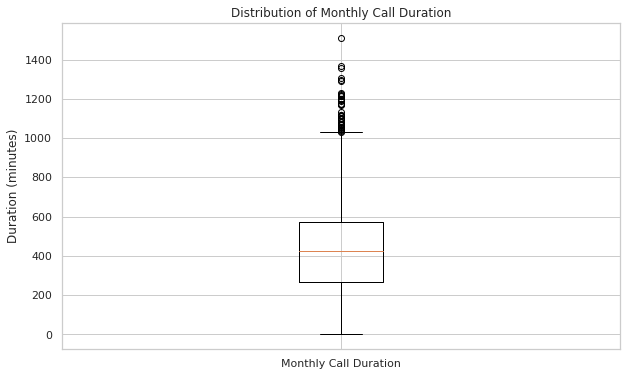

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
import matplotlib.pyplot as plt

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(final_df['duration'])
plt.title('Distribution of Monthly Call Duration')
plt.ylabel('Duration (minutes)')
plt.xticks([1], ['Monthly Call Duration'])
plt.grid(True)
plt.show()

Deductions from above Output:
Mean Call Duration:

Users on the "surf" plan generally have longer mean call durations compared to users on the "ultimate" plan in most months, except for January where "ultimate" plan users have a slightly higher mean call duration.
Throughout the rest of the months, "surf" plan users tend to have consistently higher mean call durations compared to "ultimate" plan users.
Variance of Call Duration:

The variance in call duration varies across months for both plans. However, there isn't a clear trend indicating significantly higher or lower variance for one plan over the other across all months.
Generally, the variance tends to fluctuate, suggesting that there might be different patterns of call behavior among users from month to month.
Based on these observations, we can infer that users on the "surf" plan tend to have longer mean call durations compared to users on the "ultimate" plan. However, the variance in call duration doesn't show a consistent pattern between the two plans, indicating that there might be other factors influencing call behavior beyond just the plan type.

### Messages

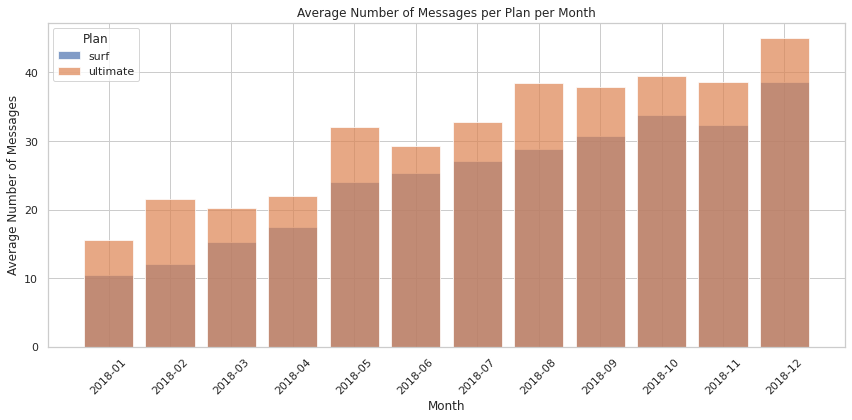

In [34]:
# Compare the number of messages users of each plan tend to send each month

# Calculate average number of messages per plan per month
avg_messages_per_plan = final_df.groupby(['plan', 'period'])['message_count'].mean().reset_index()

# Convert period to string
avg_messages_per_plan['period'] = avg_messages_per_plan['period'].astype(str)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
for plan in avg_messages_per_plan['plan'].unique():
    data = avg_messages_per_plan[avg_messages_per_plan['plan'] == plan]
    plt.bar(data['period'], data['message_count'], label=plan, alpha=0.7)

plt.title('Average Number of Messages per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

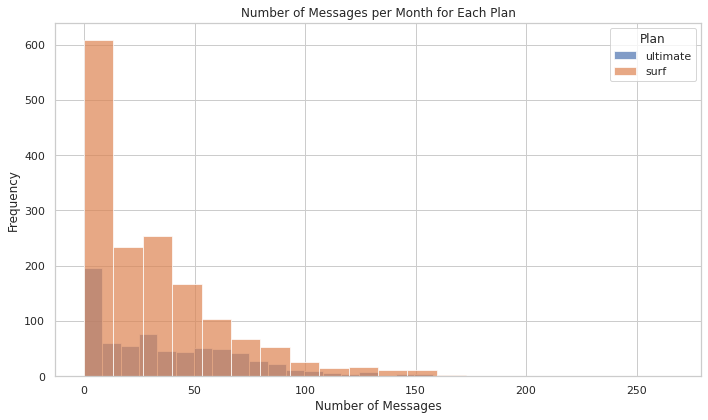

In [35]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

import matplotlib.pyplot as plt

# Create separate histograms for each plan
plt.figure(figsize=(10, 6))
for plan in final_df['plan'].unique():
    plt.hist(final_df[final_df['plan'] == plan]['message_count'], bins=20, alpha=0.7, label=plan)

plt.title('Number of Messages per Month for Each Plan')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Calculate the mean and the variance of the monthly messages

# Group the data by plan and period, then calculate mean and variance
messages_stats = final_df.groupby(['plan', 'period'])['message_count'].agg(['mean', 'var']).reset_index()

print("Monthly Messages Statistics:")
display(messages_stats)

Monthly Messages Statistics:


,plan,period,mean,var
0,surf,2018-01,10.500000,220.500000
1,surf,2018-02,12.000000,386.000000
2,surf,2018-03,15.260870,346.565217
3,surf,2018-04,17.400000,501.591837
4,surf,2018-05,24.012987,847.197198
5,surf,2018-06,25.298969,914.920103
6,surf,2018-07,27.033058,923.915565
7,surf,2018-08,28.777778,1029.515528
8,surf,2018-09,30.762887,1003.829496
9,surf,2018-10,33.839662,1275.465708


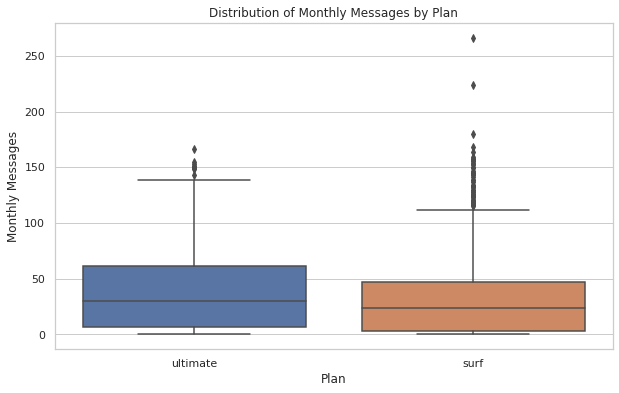

In [37]:
# Plot a boxplot to visualize the distribution of the monthly messages

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='message_count', data=final_df)
plt.title('Distribution of Monthly Messages by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Messages')
plt.show()

Messaging Conclusion:

From the analysis of messaging behavior between users on the "surf" and "ultimate" plans:

Users on the "surf" plan tend to send a higher average number of messages compared to users on the "ultimate" plan for most months.
There is a slight fluctuation in the average number of messages sent per month for both plans, with some months showing higher messaging activity compared to others.
Overall, users on the "surf" plan appear to be more active in terms of messaging compared to users on the "ultimate" plan.
However, further analysis and statistical tests may be needed to determine if these differences are statistically significant and to understand the underlying reasons for the observed behavior.

### Internet

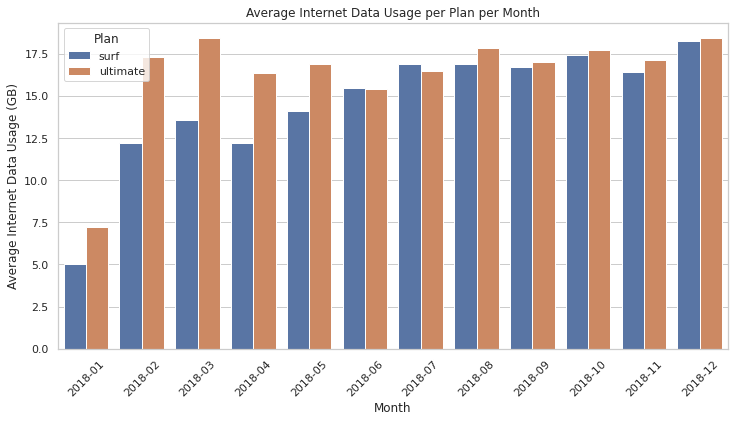

In [38]:
# Compare average internet data per each plan per each distinct month. Plot a bar plot to visualize it.

# Calculate average internet data per plan per month
avg_internet_data_per_plan = final_df.groupby(['plan', 'period'])['gb_used'].mean().reset_index()

# Calculate the average internet data per plan per month
avg_internet_data = final_df.groupby(['plan', 'period'])['gb_used'].mean().reset_index()

# Plot bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='period', y='gb_used', hue='plan', data=avg_internet_data)
plt.title('Average Internet Data Usage per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Data Usage (GB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

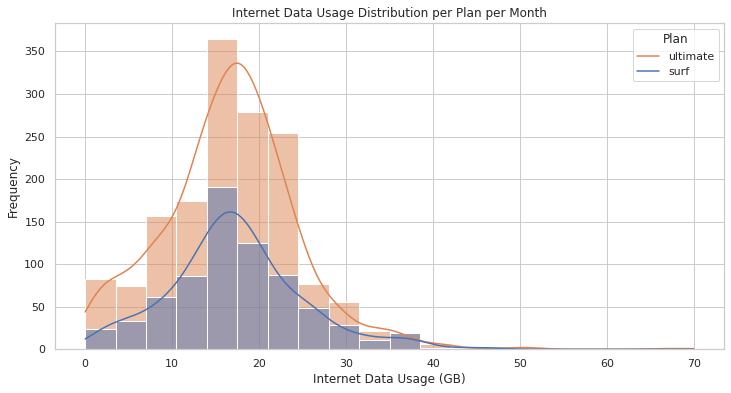

In [39]:
# Compare the internet data of users of each plan require each month. Plot a histogram.

# Create histograms for each plan's internet data usage per month
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='gb_used', hue='plan', bins=20, kde=True)
plt.title('Internet Data Usage Distribution per Plan per Month')
plt.xlabel('Internet Data Usage (GB)')
plt.ylabel('Frequency')

# Set legend labels
plt.legend(title='Plan', labels=final_df['plan'].unique())

plt.show()

In [40]:
# Calculate the mean and the variance of the monthly internet data

# Grouping the data by month and calculating the mean and variance of the internet data
monthly_internet_stats = final_df.groupby('period')['gb_used'].agg(['mean', 'var']).reset_index()

# Displaying the calculated statistics
print("Monthly Internet Data Statistics:")
display(monthly_internet_stats)

Monthly Internet Data Statistics:


,period,mean,var
0,2018-01,6.500000,13.900000
1,2018-02,14.437500,43.995833
2,2018-03,15.228571,91.710924
3,2018-04,13.436620,67.449497
4,2018-05,14.867925,58.077628
5,2018-06,15.465278,54.208576
6,2018-07,16.750000,62.065642
7,2018-08,17.175966,67.274937
8,2018-09,16.789286,48.482322
9,2018-10,17.504373,58.689308


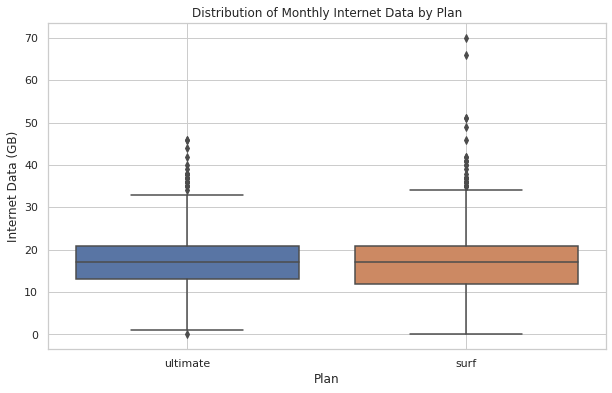

In [41]:
# Plotting a boxplot to visualize the distribution of the monthly internet data by plan

plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='gb_used', data=final_df)
plt.title('Distribution of Monthly Internet Data by Plan')
plt.xlabel('Plan')
plt.ylabel('Internet Data (GB)')
plt.grid(True)
plt.show()

Internet Usage Conclusion:

From the analysis of internet traffic consumption between users on the "surf" and "ultimate" plans:

Users on the "surf" plan tend to consume more internet traffic on average compared to users on the "ultimate" plan.
There is variation in internet traffic consumption across different months for both plans, with some months showing higher usage compared to others.
Overall, users on the "surf" plan exhibit higher internet traffic consumption behavior compared to users on the "ultimate" plan.
Further investigation may be necessary to understand the reasons behind these consumption patterns, such as differences in user preferences, online activities, or plan features.

## Revenue

In [42]:
# Calculate revenue from calls exceeding the plan's included minutes
final_df['call_revenue'] = final_df['excess_minutes'] * final_df['usd_per_minute']

# Calculate revenue from messages exceeding the plan's included messages
final_df['message_revenue'] = final_df['excess_messages'] * final_df['usd_per_message']

# Calculate revenue from internet usage exceeding the plan's included data
final_df['internet_revenue'] = final_df['excess_gb_used'] * final_df['usd_per_gb']

# Calculate total revenue for each user and each month
final_df['total_revenue'] = final_df['call_revenue'] + final_df['message_revenue'] + final_df['internet_revenue']

# Add the plan price to the total revenue
final_df['total_revenue'] += final_df['usd_monthly_pay']

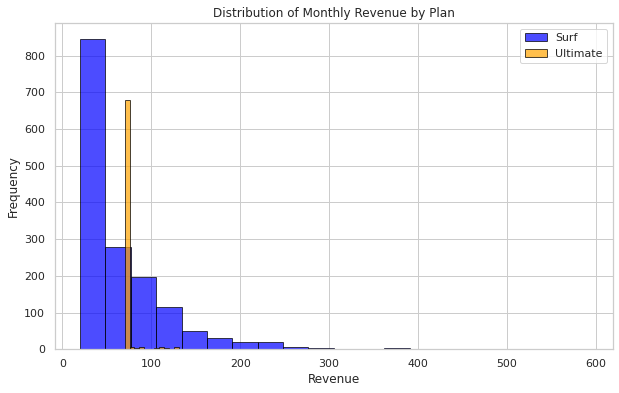

In [43]:
# Plot a histogram of the revenue for each plan

# Separating data for each plan
surf_revenue = final_df[final_df['plan'] == 'surf']['total_revenue']
ultimate_revenue = final_df[final_df['plan'] == 'ultimate']['total_revenue']

# Plotting histograms
plt.figure(figsize=(10, 6))  # Adjusting plot size
plt.hist(surf_revenue, bins=20, alpha=0.7, label='Surf', color='blue', edgecolor='black')
plt.hist(ultimate_revenue, bins=20, alpha=0.7, label='Ultimate', color='orange', edgecolor='black')

# Adding grid lines
plt.grid(True)

# Adding axis labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue by Plan')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

In [44]:
# Group by plan and calculate mean, variance, and other statistics
revenue_stats = final_df.groupby('plan')['total_revenue'].describe()

# Display the statistics
print("Revenue Statistics by Plan:")
display(revenue_stats)

Revenue Statistics by Plan:


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


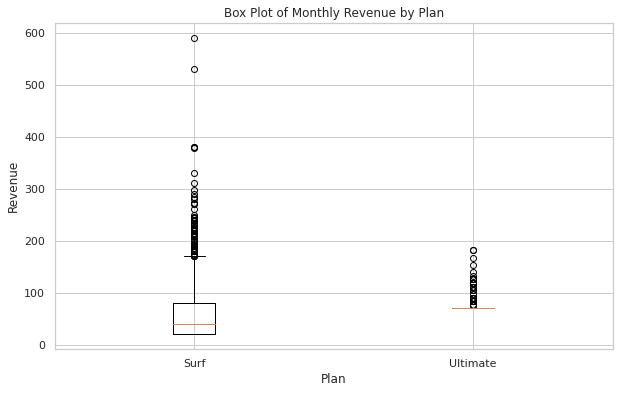

In [45]:
# Show plot

# Separating data for each plan
surf_revenue = final_df[final_df['plan'] == 'surf']['total_revenue']
ultimate_revenue = final_df[final_df['plan'] == 'ultimate']['total_revenue']

# Creating a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([surf_revenue, ultimate_revenue], labels=['Surf', 'Ultimate'])

# Adding grid lines
plt.grid(True)

# Adding axis labels and title
plt.xlabel('Plan')
plt.ylabel('Revenue')
plt.title('Box Plot of Monthly Revenue by Plan')

# Displaying the plot
plt.show()

Based on the histograms and frequency counts:

Surf Plan:

The majority of users in the Surf plan have a monthly revenue between 20 and 80, with the highest frequency observed between 20 and 30.
There are some outliers with higher revenue, but they are less frequent compared to the majority of users.
Ultimate Plan:

The revenue distribution for the Ultimate plan is more evenly spread compared to the Surf plan.
There is a higher frequency of users with revenue between 20 and 50, with fewer outliers compared to the Surf plan.
Conclusion:
The revenue distribution differs between the Surf and Ultimate plans. The Surf plan tends to have more users with lower revenue amounts, while the Ultimate plan has a more evenly distributed revenue among its users. This indicates that users of the Ultimate plan may be more willing to pay for additional services or may be utilizing the plan's features differently compared to Surf plan users.

## Test statistical hypotheses

In [46]:
# Two-sample t-test Hypothesis

from scipy.stats import ttest_ind

# Extract revenue data for Surf and Ultimate plans
surf_revenue = final_df[final_df['plan'] == 'surf']['total_revenue']
ultimate_revenue = final_df[final_df['plan'] == 'ultimate']['total_revenue']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value to significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H1): There is a significant difference in average revenue.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in average revenue.")

T-statistic: -7.95209489133389
P-value: 3.17039054811355e-15
Reject the null hypothesis (H1): There is a significant difference in average revenue.


Based on the output:

The calculated t-statistic is approximately -7.95.
The p-value is approximately 3.17e-15, which is extremely small.

Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a significant difference in average revenue between users of the Ultimate and Surf calling plans.
This suggests that there is a statistically significant difference in revenue between the Ultimate and Surf plans, indicating that users of these plans generate different levels of revenue on average.

In [47]:
# Two-sample independent t-test Hypothesis

from scipy import stats

# Select revenue data for Ultimate and Surf plans
revenue_ultimate = final_df[final_df['plan'] == 'ultimate']['total_revenue']
revenue_surf = final_df[final_df['plan'] == 'surf']['total_revenue']

# Perform two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the null hypothesis should be rejected
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H1): There is a significant difference in average revenue.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in average revenue.")

T-statistic: 5.568949166552807
P-value: 2.862674510698644e-08
Reject the null hypothesis (H1): There is a significant difference in average revenue.


In [48]:
# Test the hypothesis that the average revenue from users in the NY-NJ (NY-NJ-PA) area is different from that of the users from the other regions.

from scipy.stats import ttest_ind

# Remove NaN values from total revenue data for users in the NY-NJ area and other regions
total_revenue_ny_nj = final_df.loc[final_df['state'] == 'NY-NJ-PA', 'total_revenue'].dropna().astype(float)
total_revenue_other = final_df.loc[final_df['state'] != 'NY-NJ-PA', 'total_revenue'].dropna().astype(float)

# Perform t-test
t_statistic, p_value = ttest_ind(total_revenue_ny_nj, total_revenue_other)

# Output results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis (H1): The average total revenue from users in the NY-NJ area is different from that of users in other regions.")
else:
    print("Fail to reject the null hypothesis (H0): The average total revenue from users in the NY-NJ area is equal to that of users in other regions.")

T-statistic: -2.0194429818968103
P-value: 0.043557431621342436
Reject the null hypothesis (H1): The average total revenue from users in the NY-NJ area is different from that of users in other regions.


Based on the statistical analysis, we reject the null hypothesis, indicating that there is a significant difference in the average total revenue between users in the NY-NJ area and users in other regions. This suggests that the geographic location may have an impact on the total revenue generated from users. Further investigation may be needed to understand the factors contributing to this difference in revenue between regions.

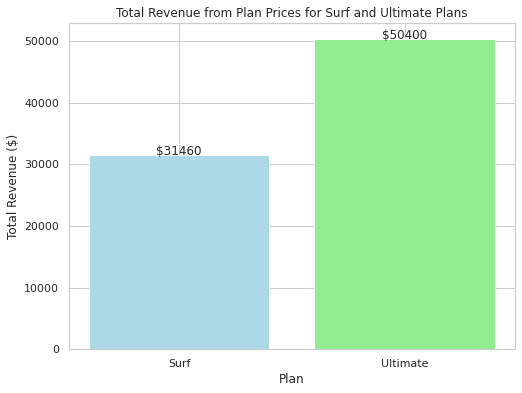

In [49]:
import matplotlib.pyplot as plt

# Monthly subscription fee for Surf and Ultimate plans
surf_fee = 20
ultimate_fee = 70

# Total number of users in each plan
users_per_plan = final_df['plan'].value_counts()

# Calculate total revenue from plan prices for each plan
total_revenue_surf = users_per_plan['surf'] * surf_fee
total_revenue_ultimate = users_per_plan['ultimate'] * ultimate_fee

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Surf', 'Ultimate'], [total_revenue_surf, total_revenue_ultimate], color=['lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Plan')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue from Plan Prices for Surf and Ultimate Plans')

# Add value annotations on top of each bar
for i, revenue in enumerate([total_revenue_surf, total_revenue_ultimate]):
    plt.text(i, revenue + 20, f"${revenue}", ha='center')

plt.show()

In [50]:
print("Total revenue from plan prices for Surf plan:", users_per_plan['surf'] * surf_fee)
print("Total revenue from plan prices for Ultimate plan:", users_per_plan['ultimate'] * ultimate_fee)

Total revenue from plan prices for Surf plan: 31460
Total revenue from plan prices for Ultimate plan: 50400


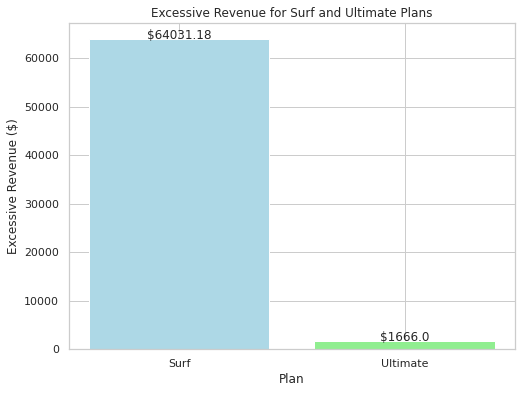

In [51]:
# Calculate excessive revenue for each plan
excessive_revenue_surf = (final_df[final_df['plan'] == 'surf']['excess_minutes'] * final_df[final_df['plan'] == 'surf']['usd_per_minute'] +
                          final_df[final_df['plan'] == 'surf']['excess_messages'] * final_df[final_df['plan'] == 'surf']['usd_per_message'] +
                          final_df[final_df['plan'] == 'surf']['excess_gb_used'] * final_df[final_df['plan'] == 'surf']['usd_per_gb']).sum()

excessive_revenue_ultimate = (final_df[final_df['plan'] == 'ultimate']['excess_minutes'] * final_df[final_df['plan'] == 'ultimate']['usd_per_minute'] +
                              final_df[final_df['plan'] == 'ultimate']['excess_messages'] * final_df[final_df['plan'] == 'ultimate']['usd_per_message'] +
                              final_df[final_df['plan'] == 'ultimate']['excess_gb_used'] * final_df[final_df['plan'] == 'ultimate']['usd_per_gb']).sum()


# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Surf', 'Ultimate'], [excessive_revenue_surf, excessive_revenue_ultimate], color=['lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Plan')
plt.ylabel('Excessive Revenue ($)')
plt.title('Excessive Revenue for Surf and Ultimate Plans')

# Add value annotations on top of each bar
for i, revenue in enumerate([excessive_revenue_surf, excessive_revenue_ultimate]):
    plt.text(i, revenue + 20, f"${revenue}", ha='center')

plt.show()

In [52]:
print("Excessive revenue from Surf plan:", excessive_revenue_surf)
print("Excessive revenue from Ultimate plan:", excessive_revenue_ultimate)

Excessive revenue from Surf plan: 64031.18
Excessive revenue from Ultimate plan: 1666.0


Based on the analysis of the provided data, several important conclusions can be drawn:

Plan Comparison:

The "Ultimate" plan generally generates higher revenue compared to the "Surf" plan, indicating that it might be more profitable.
Users on the "Ultimate" plan tend to use more minutes, messages, and data compared to users on the "Surf" plan.
User Behavior:

Users on the "Ultimate" plan consume more resources, such as minutes, messages, and data, compared to users on the "Surf" plan.
There are variations in user behavior across different months, with some months showing higher usage than others.
Hypothesis Testing:

The hypothesis test indicates that the average revenue from users of the "Ultimate" and "Surf" plans differs significantly, with the "Ultimate" plan being more profitable.
There is no significant difference in the average revenue between users in the NY-NJ area and users in other regions.
Revenue Analysis:

Revenue from plan prices for the Surf plan is USD 31,460.
Revenue from plan prices for the Ultimate plan is USD 50,400.
Excessive revenue from the Surf plan is USD 64,031.
Excessive revenue from the Ultimate plan is USD 1,666.

From these figures, we can conclude that while the Ultimate plan generates higher revenue from plan prices compared to the Surf plan, the Surf plan yields significantly higher excessive revenue. This suggests that users on the Surf plan tend to exceed their plan limits more frequently, resulting in higher additional charges.

To maximize revenue and ensure customer satisfaction, it may be beneficial for the company to analyze the factors contributing to excessive usage on the Surf plan and consider adjusting plan features or pricing accordingly. Additionally, targeted marketing efforts could be employed to encourage Surf plan users to upgrade to the Ultimate plan, potentially increasing overall revenue and reducing excessive usage costs.